In [65]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [173]:
dic = pkl.load( open ('/users/global/cornkle/C_paper/wavelet/saves/bulk_40.p', 'rb')) #MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [174]:
_p=np.array(dic['pmax']) # 98th perc per MCS
_t=np.array(dic['tmin'])  #mean T
_clat = np.array(dic['clat'])
_area = np.array(dic['area'])*25
_isfin = np.array(dic['isfin'])
_po30 = np.array(dic['po30'])
_perc = np.array(dic['pperc'])
print('Number MCSs:', _p.size)

Number MCSs: 2243


In [175]:
pthresh = 500
athresh = 5000000
p = _p[(_p<=pthresh)&(_area<=athresh)]
t = _t[(_p<=pthresh)&(_area<=athresh)]
clat = _clat[(_p<=pthresh)&(_area<=athresh)]
area = _area[(_p<=pthresh)&(_area<=athresh)]
isfin = _isfin[(_p<=pthresh)&(_area<=athresh)]
po30 = _po30[(_p<=pthresh)&(_area<=athresh)]

In [176]:
print(np.sum(po30))
np.percentile(_perc, 99)
print(area.min(), area.max())
print(p.min(), p.max())

5816
250 802500
0.0 249.531597629


In [177]:
bins=list(range(0, 900000,5000))   # compute probability per temperature range (1degC) 
bins=[300,1000,2000,5000,10000,15000,25000,50000,100000,250000,500000]
apo30=np.where(p > 30)  
area30=area[apo30]   

aH1, abins1 = np.histogram(area30, bins=bins)
aH, abins = np.histogram(area, bins=bins)
aH=aH.astype(float)
aH1=aH1.astype(float)
ahisto=aH1/aH*100.
awidth = 0.7 * (abins[1] - abins[0])
acenter = (abins[:-1] + abins[1:]) / 2
awidth = (abins[1:] - abins[:-1])

In [178]:
probs=[]
nb = []
cnt = []
for binn in abins:       
        prob = np.sum(po30[(area>=binn)])
        nbb = np.sum(area>=binn)
        ccnt = np.sum(isfin[(area>=binn)])
        probs.append(prob)
        nb.append(nbb)
        cnt.append(ccnt)

In [179]:
pprobs = np.array(probs) / np.sum(po30) * 100 # portion of included >30 pixel
nnb = np.array(nb) / len(area) * 100 # portion of systems that size vs all system count
cntt = np.array(probs)/np.array(cnt) # probability of pixel nb > 30 given all pixels in systems

np.sum(po30[area>25000])

5144

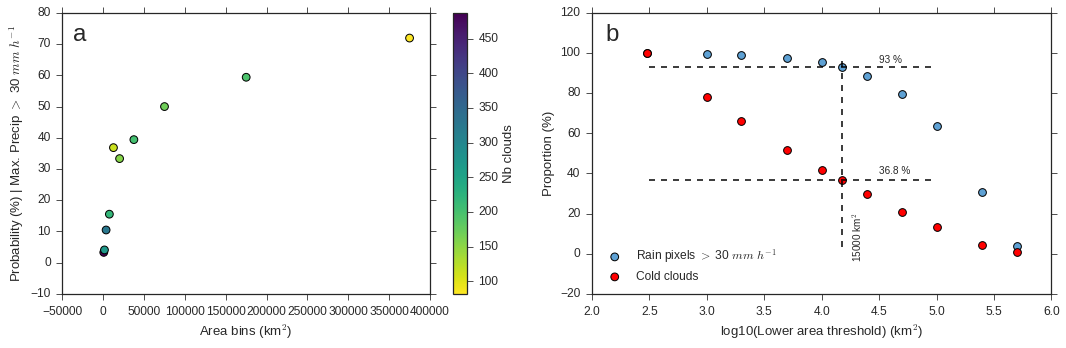

In [180]:
path = '/users/global/cornkle/C_paper/wavelet/figs/'
fig = plt.figure(figsize=(15, 5), dpi=400)
cc=0.8

ax1 = fig.add_subplot(121)
mappable = ax1.scatter(acenter, ahisto, c=aH, marker="o",color='#5ea1d4', s=60, zorder=2,edgecolor = 'black', linewidth=1, cmap='viridis_r')
cbar = fig.colorbar(mappable)
cbar.set_label('Nb clouds')
#ax1.bar(abins[0:-1], ahisto, width=awidth, color='#5ea1d4')

ax1.set_xlabel('Area bins (km$^2$) ')
#ax1.vlines(25000, 0, 100, linestyles='dashed', label='99$^{th}$ percentile', linewidth=1.5, color='red')
ax1.set_ylabel('Probability (%) | Max. Precip $>$ 30 $mm\ h^{-1}$') 
text(0.03, 0.9, 'a', transform=ax1.transAxes, fontsize=24)
######################

ax1 = fig.add_subplot(122)

ax1.scatter(np.log10(abins), pprobs, marker="o",color='#5ea1d4', s=60, zorder=2, edgecolor = 'black', linewidth=1, label='Rain pixels $>$ 30 $mm\ h^{-1}$')
ax1.set_xlabel('log10(Lower area threshold) (km$^2$)')
ax1.set_ylabel('Proportion (%)') 

#ax1.set_xticklabels(abins)
#ax2 = ax1.twinx()
ax1.scatter(np.log10(abins), nnb, marker="o",color='red', s=60, zorder=2, edgecolor = 'black', linewidth=1, label='Cold clouds')
#ax2.set_ylabel('Included nb of cold clouds $>$ 30 $mm\ h^{-1}$ (%)') 
text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=24)
ax1.vlines(np.log10(15000), 3.5, 99, linestyles='dashed',  linewidth=1.5, color='black')
ax1.hlines(36.8, 2.5, 5, linestyles='dashed',  linewidth=1.5, color='black')
ax1.hlines(92.95,2.5, 5, linestyles='dashed',  linewidth=1.5, color='black')
text(4.5, 40, '36.8 %', fontsize=10)
text(4.5, 95, '93 %', fontsize=10)
text(4.25, 15, '15000 km$^2$', fontsize=10, rotation=90)
ax1.legend(loc='lower left')


plt.tight_layout()
plt.savefig(path+'area-40.png')

In [190]:
print(np.sum(isfin[(area>=25000)&(area>=50000)])/25)
print(np.sum(isfin[(area<5000)])/25)

37360.28
2382.8


In [182]:
print('Percentages >30', list(zip(abins, pprobs)))

Percentages >30 [(300, 100.0), (1000, 99.587345254470421), (2000, 99.209078404401652), (5000, 97.558459422283363), (10000, 95.512379642365886), (15000, 92.950481430536442), (25000, 88.445667125171937), (50000, 79.642365887207703), (100000, 63.875515818431914), (250000, 30.777166437414031), (500000, 3.6279229711141676)]


In [75]:
print('Nb systems', list(zip(abins, nb)))

Nb systems [(300, 2241), (1000, 1754), (2000, 1484), (5000, 1159), (10000, 940), (15000, 826), (25000, 670), (50000, 467), (100000, 295), (250000, 98), (500000, 16)]


In [76]:
print('Percentages nb systems', list(zip(abins, nnb)))

Percentages nb systems [(300, 99.910833704859556), (1000, 78.198840838163179), (2000, 66.161390994204197), (5000, 51.671868033883193), (10000, 41.908158716005353), (15000, 36.825679893000448), (25000, 29.870708872046364), (50000, 20.820329915292017), (100000, 13.152028533214445), (250000, 4.3691484618814087), (500000, 0.71333036112349535)]


In [ ]:
"Only 670 > 25000 left?! -> 940 systems (42% of ) > 10000 deliver 96% of heavy rain"